In [1]:
#Import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
#Import the dataset
dataset = pd.read_csv('data/salary_data.csv')
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## EDA (Exploratory Data Analysis)

In [3]:
#Shape of the data
dataset.shape

(32561, 15)

In [4]:
#Check the dtype
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [5]:
#check the number of unique values form all datatype
dataset.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

In [6]:
#check the number of unique values form all the object datatype
dataset.select_dtypes(include='object').nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
salary             2
dtype: int64

In [7]:
#the native country have the many unique values lets segment this into smaller unique value
dataset['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [8]:
#Function to segment countries using the continents
def continents(country):
    if country in [' United-States', ' Canada', ' England', ' Germany', ' France', ' Italy', ' Holand-Netherlands', ' Ireland', ' Scotland', ' Portugal', ' Greece']:
        return 'Western'
    elif country in [' India', ' Japan', ' China', ' Hong', ' Taiwan', ' Philippines', ' Vietnam', ' Thailand', ' Laos']:
        return 'Asian'
    elif country in [' Mexico', ' Cuba', ' Jamaica', ' Puerto-Rico', ' Honduras', ' El-Salvador', ' Guatemala', ' Dominican-Republic', ' Nicaragua', ' Peru', ' Columbia']:
        return 'Latin American'
    else:
        return 'Other'

# Apply the function to create a new column 'region'
dataset['region'] = dataset['native-country'].apply(continents)   

In [9]:
#check the number of unique values form all the object datatype
dataset.select_dtypes(include='object').nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
salary             2
region             4
dtype: int64

In [10]:
#Check the amount of missing values
check_missing = dataset.isnull().sum()*100/dataset.shape[0]
check_missing[check_missing>0].sort_values(ascending=False)

Series([], dtype: float64)

In [11]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
region            0
dtype: int64

In [12]:
#Drop the native country column because we do not nedd anymore 
dataset.drop(columns='native-country', inplace=True)

In [13]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary,region
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K,Western
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K,Western
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K,Western
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K,Western
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,Latin American


In [14]:
dataset.drop(columns='fnlwgt', inplace=True)

In [15]:
#label Encoding for Object Datatypes

In [16]:
#loop over each coloum in Dataframe where dtype is object
for col in dataset.select_dtypes(include=['object']).columns:
    #print the column name and the unique valeus
    print(f"{col}: {dataset[col].unique()}")


workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex: [' Male' ' Female']
salary: [' <=50K' ' >50K']
region: ['Western' 'Latin Am

In [17]:
#Loop over each coloum in the Dataframe where dtype is 'object'
for col in dataset.select_dtypes(include=['object']).columns:
    
    le = LabelEncoder()
    #Fit the encoder to the unique values in the column
    le.fit(dataset[col].unique())
    #Tranform the coloum using the encoder
    dataset[col] = le.transform(dataset[col])
    #print the column name and the unique encoded values
    print(f'{col}:{dataset[col].unique()}')
    
    
    

workclass:[7 6 4 1 2 0 5 8 3]
education:[ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
marital-status:[4 2 0 3 5 1 6]
occupation:[ 1  4  6 10  8 12  3 14  5  7 13  0 11  2  9]
relationship:[1 0 5 3 4 2]
race:[4 2 1 0 3]
sex:[1 0]
salary:[0 1]
region:[3 1 0 2]


In [18]:
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary,region
0,39,7,9,13,4,1,1,4,1,2174,0,40,0,3
1,50,6,9,13,2,4,0,4,1,0,0,13,0,3
2,38,4,11,9,0,6,1,4,1,0,0,40,0,3
3,53,4,1,7,2,6,0,2,1,0,0,40,0,3
4,28,4,9,13,2,10,5,2,0,0,0,40,0,1


In [19]:
#check the outliers in the dataset


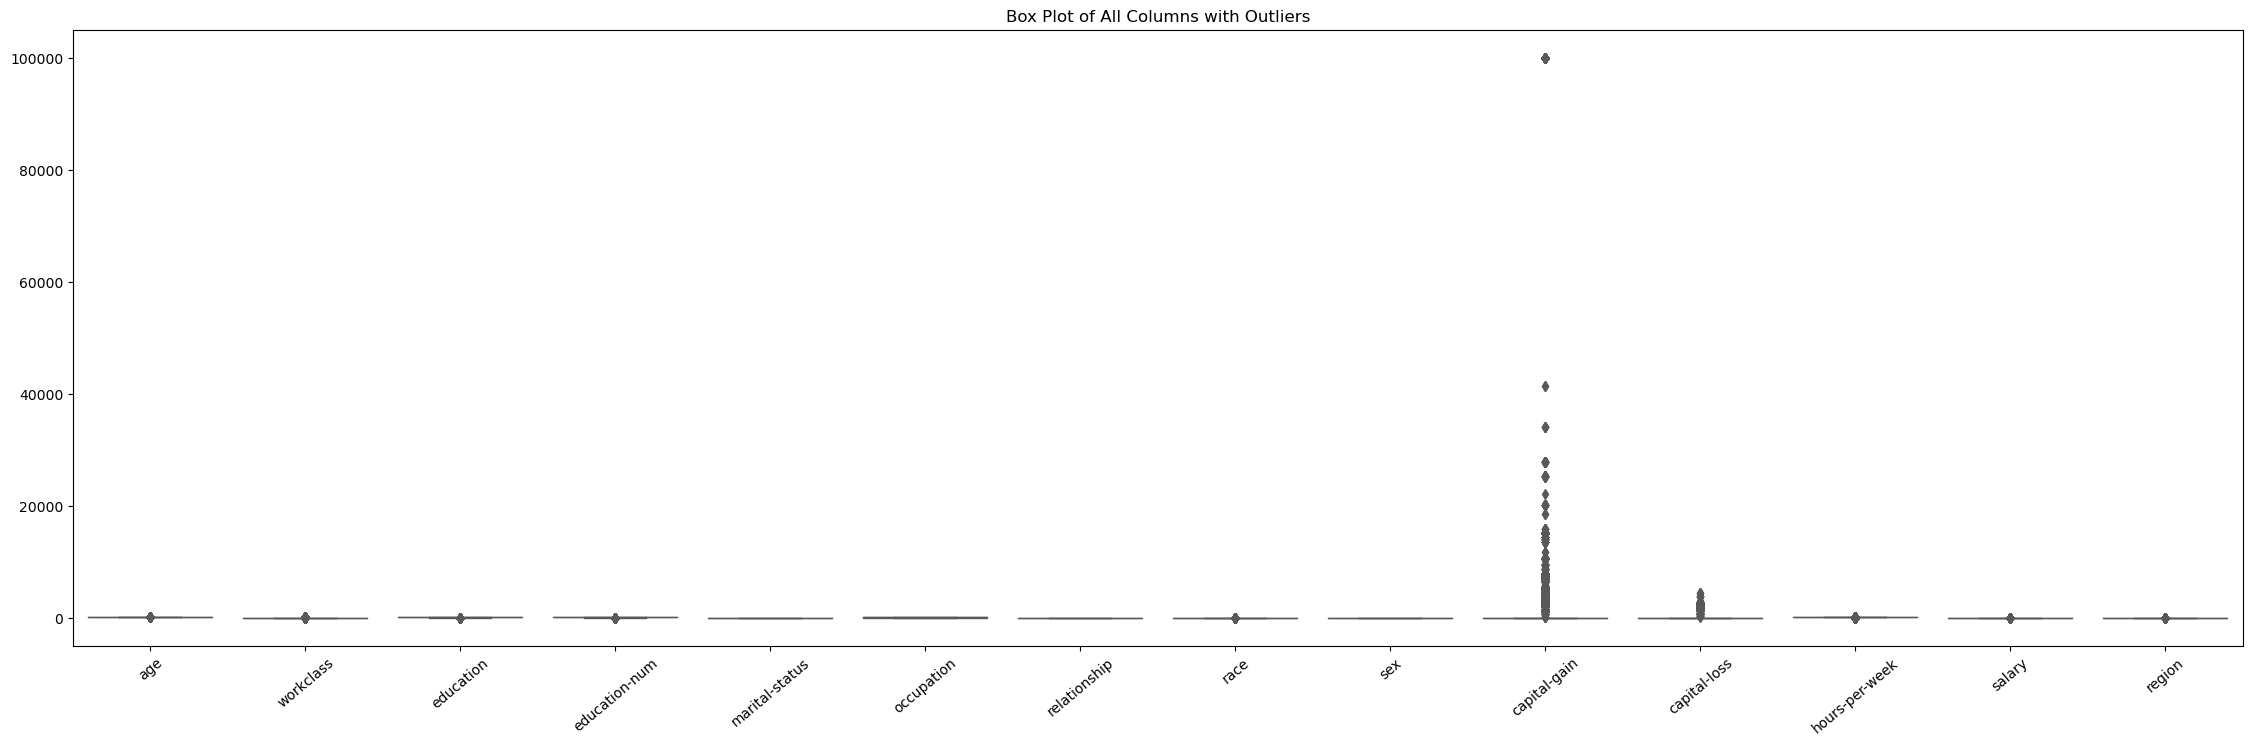

In [20]:
#check the outliers in the dataset
# Create a box plot for all columns
plt.figure(figsize=(28, 8))
sns.boxplot(data=dataset, palette='Set2', fliersize=5, linewidth=1)
plt.title('Box Plot of All Columns with Outliers')
plt.xticks(rotation=40)
plt.show()

<Axes: >

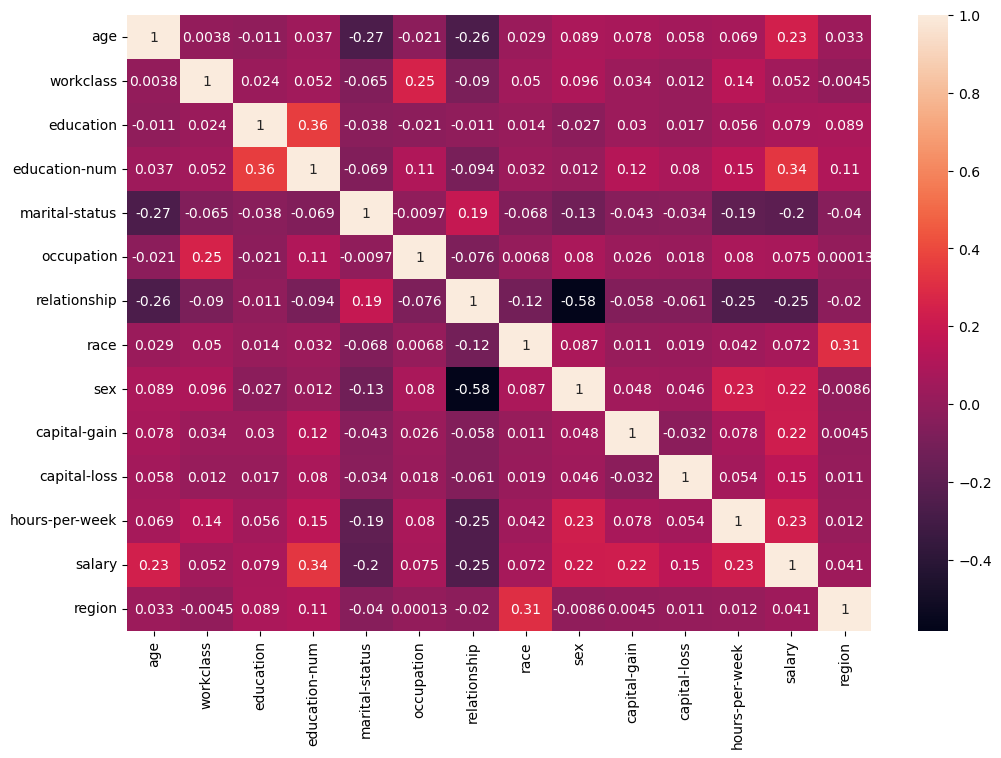

In [21]:
# Cheking the correation using the Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), fmt='.2g', annot=True)

In [22]:
x = dataset.drop('salary', axis=1)
y = dataset['salary']

In [23]:
x

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,region
0,39,7,9,13,4,1,1,4,1,2174,0,40,3
1,50,6,9,13,2,4,0,4,1,0,0,13,3
2,38,4,11,9,0,6,1,4,1,0,0,40,3
3,53,4,1,7,2,6,0,2,1,0,0,40,3
4,28,4,9,13,2,10,5,2,0,0,0,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,7,12,2,13,5,4,0,0,0,38,3
32557,40,4,11,9,2,7,0,4,1,0,0,40,3
32558,58,4,11,9,6,1,4,4,0,0,0,40,3
32559,22,4,11,9,4,1,3,4,1,0,0,20,3


In [24]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int32

#### Train-Test split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

##### Remove the outliers from the Train Data

In [27]:
#define the coloum for which we want to reomve the outliers
select_column = ['age','capital-gain','capital-loss','hours-per-week']

# calculate the Z-score for the selected column in the training data
z_scores = np.abs(stats.zscore(x_train[select_column]))

threshold =3

outlier_indices = np.where(z_scores > threshold)[0]
#reomve the outleirs from the training data
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [28]:
#Feature Scaling / Data Preporcessing tool kit 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#### Data Modeling

## Model-1 Decision Tree Classifiers

In [29]:
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid ={
    'max_depth' : [3,4,5,6,7,8],
    'min_samples_split' :[2,3,4],
    'min_samples_leaf' : [1,2,3,4],
    'random_state' : [0,42]
}

#Perform the grid search with cross-validation to find the best hypermeter
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(x_train, y_train)

#print the ebst hyperparameter
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [30]:
dtree = DecisionTreeClassifier(random_state=0,max_depth=8,min_samples_leaf=2,min_samples_split=2,class_weight='balanced')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=2,
                       random_state=0)

In [31]:
# Predict labels for the test set
y_pred = dtree.predict(x_test)

# Convert Series to NumPy array and then concatenate
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), 1))


[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 0]
 [1 1]]


In [32]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[3830 1088]
 [ 329 1266]]


Text(0.5, 1.0, 'Accuracy Score for  DecisionTreeClassifier: 0.782435129740519')

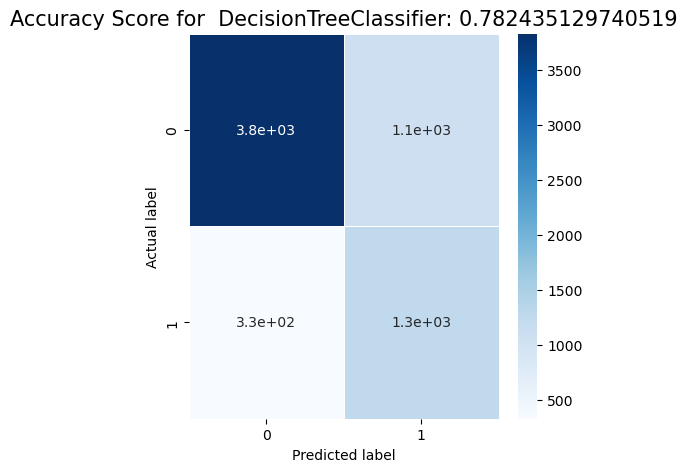

In [33]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=conf_mat,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for  DecisionTreeClassifier: {0}'.format(dtree.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [34]:
y_pred = dtree.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))


Accuracy Score : 78.24 %
F-1 Score :  0.7824351297405189
Precision Score :  0.782435129740519
Recall Score :  0.782435129740519


## Model-2 gaussianNB

In [35]:
#Trainng the Naive Bayes model on the Training ser
classifier1 = GaussianNB()
classifier1.fit(x_train, y_train)

GaussianNB()

In [36]:
# Predict labels for the test set
y_pred = classifier1.predict(x_test)

# Convert Series to NumPy array and then concatenate
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), 1))


[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 0]
 [1 1]]


In [37]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[4278  640]
 [ 632  963]]


Text(0.5, 1.0, 'Accuracy Score for GaussianNB: 0.8046982957162598')

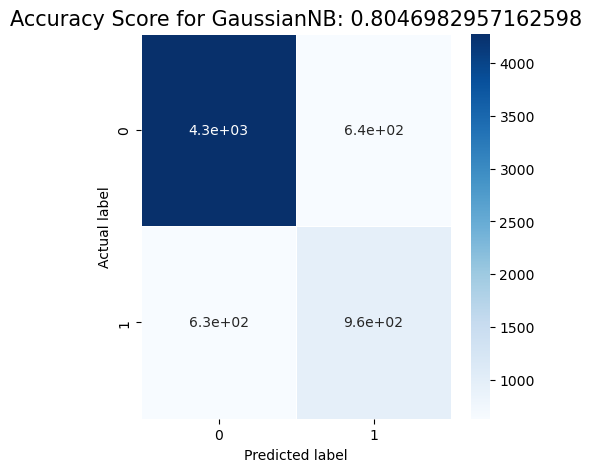

In [38]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=conf_mat,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for GaussianNB: {0}'.format(classifier1.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [39]:
y_pred = classifier1.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))


Accuracy Score : 80.47 %
F-1 Score :  0.8046982957162598
Precision Score :  0.8046982957162598
Recall Score :  0.8046982957162598
